# Data Preparation Tutorial for Machine Learning

In this tutorial we will look at how to prepare your data for optimal results in machine learning. We will combine data on bike traffic and data on weather conditions, because we want to predict how much bike traffic we can expect based on what the weather is like. We will access Open Data sources, verify the data for structure and consistency, and clean up any spelling or formatting errors that would impair a computing process, and enrich the data with any additional values that you need to produce accurate results. Linear Regression is the most simple model there is for prediction of ... (JvdK what is it for???) 

But where do we get our data?! Fortunately, the city of Ottawa has a few bike counters keeping daily counts of cyclists along certain routes. Their Open Data website is very helpful. For the weather, we can use Environment Canada which lets you download historical weather data. We can combine these two data sets to get our training data. We have already downloaded the datasets and you can find them in the tutorial repostory.


Comment: FT & FB moved this here to intro the user to what they are doing. It seems that here in this file, we are trying to clean the read and clean the data. If this is the case, you might as well include this piece of information and the objectives to be achieved in this file in this very first section of explanation. 

## Learning Objectives

Average time to complete: 60min

By the end of this tutorial you should be able to:
* Clean your data and describe why this is important for machine learning
* Describe what the Linear Regression is and how we run? it for machine learning
* FB add more

Comment: Please check the objectives above and make any necessary changes. 

## Tools you will need for this tutorial

* See the introduction (notebook or file) for general requirements
* We'll need Pandas for convenient data handling. It's a very powerful Python package that can read CSV and Excel files. It also has very good data manipulation capabilities which come in use for data cleaning.
* We will use scikit learn as our machine learning package. 
* list all softwares (and maybe libraries? JvdK?)
* file names for the two data sets to combine

Comment: 
Is tools the right terminology for this heading? 

Comment: in the first line "see the intro..." choose the rigth term. Is it a file or a notebook. 

## RDM best practices

Good data handling for machine learning begins with good research data managment (RDM). The quality of your source data will impact the outcome of your results, just like the reproducibility of your results will depend on the quality of your data sources, in addition to how you organize the data so that other people (and machines!) can understand and reuse it. 

We also need to respect a few research data management best practices along the way, these best practices are recommended by the [Digital Research Alliance of Canada](https://zenodo.org/records/4000989).

SAVE YOUR RAW DATA IN ORIGINAL FORMAT
* Don't overwrite your original data with a cleaned version.
* Protect your original data by locking them or making them read-only.
* Refer to this original data if things go wrong (as they often do).

BACKUP YOUR DATA
* Use the 3-2-1 rule: Save three copies of your data, on two different storage mediums, and one copy off site.

Comment: can you put a note on where your data is stored and backed up etc to follow this rule?
* We are using Open Data, so it does not contain any personally identifiable data or data that needs to be restricted or protected in any way.

Comment: Can you make a comment about how encryption or security is important if data is not open and needs to be protected?

There are a few more RDM best practices that will help you in your project management, and we will highlight them at the beginning of each tutorial. 

## Cleaning your data

Comment: JvdK please write a short intro to address the 5Ws of data cleaning and transition to the Pandas application stuff


In [1]:
# If you are running this code on SyZyGy you need to install a slightly newer version of Pandas.
# Run this cell and then restart the kernel.
!pip install "pandas==1.5.3"

  Obtaining dependency information for pandas==1.5.3 from https://files.pythonhosted.org/packages/da/6d/1235da14daddaa6e47f74ba0c255358f0ce7a6ee05da8bf8eb49161aa6b5/pandas-1.5.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/10.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.3 MB ? eta -:--:--
    --------------------------------------- 0.2/10.3 MB 3.3 MB/s eta 0:00:04
   -- ------------------------------------- 0.5/10.3 MB 5.6 MB/s eta 0:00:02
   ---- ----------------------------------- 1.1/10.3 MB 6.9 MB/s eta 0:00:02
   ------ --------------------------------- 1.6/10.3 MB 8.0 MB/s eta 0:00:02
   -------- ------------------------------- 2.1/10.3 MB 8.5 MB/s eta 0:00:01
   ---------- ----------------------------- 2.7/10.3 MB 9.1 MB/s eta 0:00:01
   ----------- ---------------------------- 3.1/10.3 MB 8.9 MB/s eta 0:00:01
   ------------ --------------------------- 3.2/10.3 MB 8.1 MB/s eta 0:00:01
   ------------- --------------

In [5]:
import pandas as pd
pd.__version__

'1.5.3'

We will look at bike traffic and we want to predict how much bike traffic we can expect based on what the weather is like.

To be able to do this, we need data on bike traffic and data on weather conditions. Fortunately, the city of Ottawa has a few bike counters gather daily counts of cyclists along certain routes. Their [Open Data website](https://open.ottawa.ca/) is very helpful. For the weather, we can use Environment Canada which lets you download historical weather data. We can combine these two data sets to get our training data.

Comment: link to Environment Canada data source please

#### Data set 1: Cycling data

Comment: if the users need to run the code below to be able to read the data in their own comupter, explain it here. Something like:  "In order to read the data in your computer you need to run the code below. We name the file bike2020. The first line which is a comment is the information of the website where we got the data."

https://open.ottawa.ca/documents/bicycle-trip-counters/about
bike2020 = pd.read_excel('bike_counter.xlsx', sheet_name="2020")

Let's see what we got

In [3]:
bike2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       366 non-null    datetime64[ns]
 1   1^ALEX     257 non-null    float64       
 2   2^ORPY     257 non-null    float64       
 3   3^COBY     267 non-null    float64       
 4   4^CRTZ     366 non-null    int64         
 5   5^LMET     366 non-null    int64         
 6   10^OGLD    360 non-null    float64       
 7   11 OBVW    365 non-null    float64       
 8   12a^ADAWE  336 non-null    float64       
 9   12b^ADAWE  336 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(2)
memory usage: 28.7 KB


The column names may seem very cryptic, but fortunately, the City of Ottawa follows good RDM best practices and has described the variables in a summary on their website. This clear documentation of the variables as they correspond to the data colleciton process helps us to reuse this data!

The summary explains that these columns represent aspects of the various routes that data was collected on. 

*Non-null* values are the number of days that the equipment registered "counts of bike trips (both directions summed unless otherwise noted)" 

Notice that we have 366 entries (one for each day of a leap-year), but if we look at the routes, we don't always have 366 non-null values *This indicates missing data!*

Missing data is fairly typical for raw datasets. The summary notes that sometimes equipment is not functional, and measurements cannot be collected.

Lets see if this missing data will impact the accuracy of our results? let's see if our data is ok. We can use the various plotting functions for checking the data.


Comment: What do you mean from "lets see if our data is ok?" ok for computational processing? explain more here. explain plotting functions. 

<AxesSubplot: xlabel='Date', ylabel='[12b^ADAWE]'>

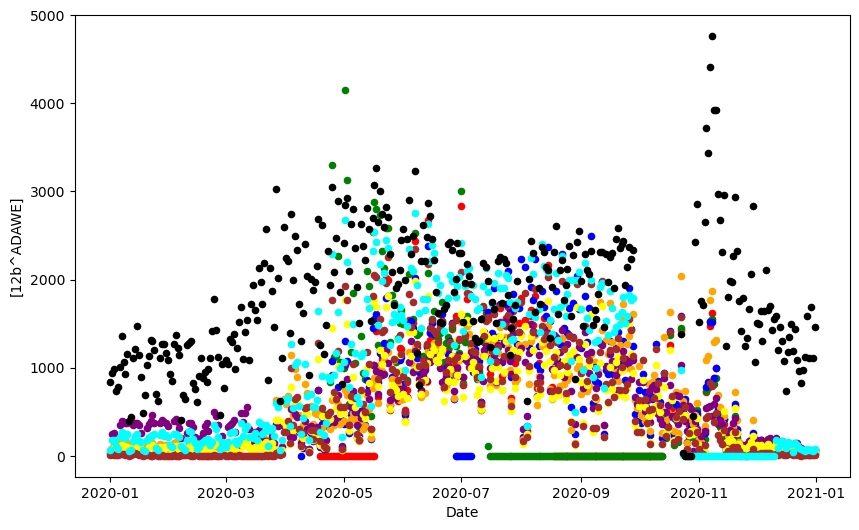

In [4]:
ax = bike2020.plot(x='Date', y=['1^ALEX'], kind='scatter', color='red', figsize=(10,6))
bike2020.plot(x='Date', y=['2^ORPY'], kind='scatter', color='green', ax=ax)
bike2020.plot(x='Date', y=['3^COBY'], kind='scatter', color='blue', ax=ax)
bike2020.plot(x='Date', y=['4^CRTZ'], kind='scatter', color='orange', ax=ax)
bike2020.plot(x='Date', y=['5^LMET'], kind='scatter', color='purple', ax=ax)
bike2020.plot(x='Date', y=['10^OGLD'], kind='scatter', color='yellow', ax=ax)
bike2020.plot(x='Date', y=['11 OBVW'], kind='scatter', color='brown', ax=ax)
bike2020.plot(x='Date', y=['12a^ADAWE'], kind='scatter', color='cyan', ax=ax)
bike2020.plot(x='Date', y=['12b^ADAWE'], kind='scatter', color='black', ax=ax)

Comment: what is the plotting function we see above? You can add a descriptive name or explain what that is showing. 

We should be suspicious of 0 values in this plotting graph, they show us that there will be an impact on our prediction results due to missing data. For example, the plotting graph shows several dates where there is no data registered on the routes at all, indicating 0 bike trips. The assumption we are working from, based on the website data summary, is that there is at least one cyclist every day, even in the worst of weathers. We will assume then, that the 0 value means that the road was closed or the counter was broken. Is that a valid assumption? For the purpose of our prediction model it will have a greater impact on the accuracy of results if we keep the 0 value, than if we clean it up. So we will remove this data by changing the value from 0 to *NaN.* This will improve the validity of our results in the Linear Regression.  

RDM best practice is never to have a blank or empty value in a cell. In our example, we don't want a 0 value because it will be processed as a numerical value, we use NaN "Not a Number" to indicate in our machine learning model that this value should be ignored in the data processing. 


Comment: What is NaN? what is its use for? More prepration or installation of libraries needed to access/run Nan?

In [5]:
# Loop over all column names except the Date column
for colname in bike2020.columns.drop('Date'):
    bike2020.loc[bike2020[colname] <= 0.01, colname] = pd.NA

<AxesSubplot: xlabel='Date', ylabel='[12b^ADAWE]'>

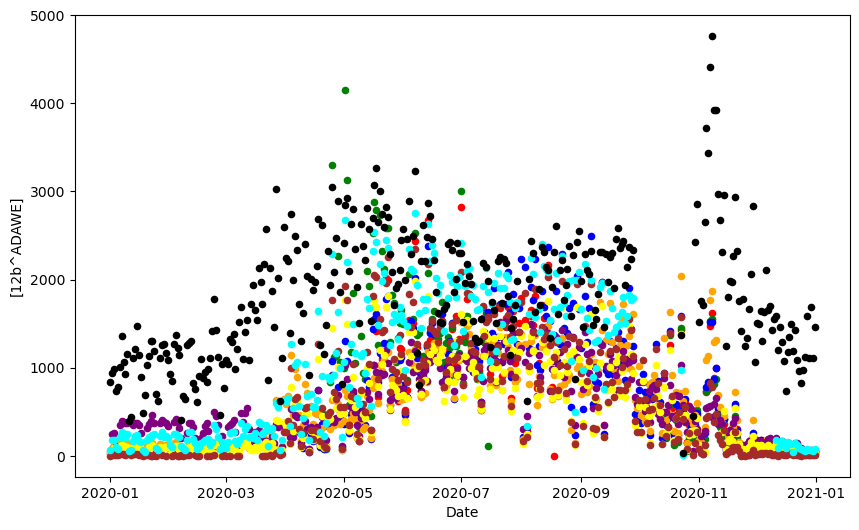

In [6]:
ax = bike2020.plot(x='Date', y=['1^ALEX'], kind='scatter', color='red', figsize=(10,6))
bike2020.plot(x='Date', y=['2^ORPY'], kind='scatter', color='green', ax=ax)
bike2020.plot(x='Date', y=['3^COBY'], kind='scatter', color='blue', ax=ax)
bike2020.plot(x='Date', y=['4^CRTZ'], kind='scatter', color='orange', ax=ax)
bike2020.plot(x='Date', y=['5^LMET'], kind='scatter', color='purple', ax=ax)
bike2020.plot(x='Date', y=['10^OGLD'], kind='scatter', color='yellow', ax=ax)
bike2020.plot(x='Date', y=['11 OBVW'], kind='scatter', color='brown', ax=ax)
bike2020.plot(x='Date', y=['12a^ADAWE'], kind='scatter', color='cyan', ax=ax)
bike2020.plot(x='Date', y=['12b^ADAWE'], kind='scatter', color='black', ax=ax)

Comment: explain what we are looking at that makes this a Better plotting graph :)

Better! The Black plot looks odd, though, it has a significantly different pattern than the plotting for the other colours. Weird peak in November for "12b^ADAWE". Website refers to this as "Adàwe Crossing Pedestrians". Is that really cyclists? Is this another set of outlier values that will impact the validity of our prediction model? 

Comment: did you remove the values of the black dots? did you keep them? WHY? Also, add a conclusion sentence here about why you are satisfied that the data is good enough to put in the model now. Be really clear with the learners or they will get confused/distracted by secondary considerations. 

#### Data set 2: Weather data

Now lets take a look at the weather datset we will combine with the cyclist data! Use file weather2020 in the tutorial repository, which we downloaded from Environment Canada.

Comment: Can add the sentence "to read the file we need to run the code below. we call this file weather2020."

In [7]:
# https://climate.weather.gc.ca/climate_data/daily_data_e.html?hlyRange=2011-12-14%7C2023-01-25&dlyRange=2011-12-15%7C2023-01-25&mlyRange=%7C&StationID=49568&Prov=ON&urlExtension=_e.html&searchType=stnName&optLimit=yearRange&StartYear=1840&EndYear=2023&selRowPerPage=25&Line=14&searchMethod=contains&txtStationName=ottawa&timeframe=2&time=LST&Day=25&Year=2020&Month=1#
weather2020 = pd.read_csv('en_climate_daily_ON_6106001_2020_P1D.csv')
weather2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Longitude (x)              366 non-null    float64
 1   Latitude (y)               366 non-null    float64
 2   Station Name               366 non-null    object 
 3   Climate ID                 366 non-null    int64  
 4   Date/Time                  366 non-null    object 
 5   Year                       366 non-null    int64  
 6   Month                      366 non-null    int64  
 7   Day                        366 non-null    int64  
 8   Data Quality               0 non-null      float64
 9   Max Temp (°C)              362 non-null    float64
 10  Max Temp Flag              4 non-null      object 
 11  Min Temp (°C)              362 non-null    float64
 12  Min Temp Flag              4 non-null      object 
 13  Mean Temp (°C)             362 non-null    float64

In these columns we see many different types of weather as they correspond to number of days these weather conditions were experienced in a year. When we clean up this data we will only use the most common weather conditions. We will remove any values that are less than 10, in order to improve the accuracy of our prediction model. 

Comment: I have changed your narrative to remove ambiguity for the learner. Please verify if I understand correctly what is happening. TBH the choice to remove the "Flag" variables seems kind of random because some of them were left in if they have a variable of above 4!!! Also, then you take out ALL the " Flag data in a later step in the tutorial!!!!! "Lots of columns have only a few data points. Might as well get rid of those." just makes people ask, why is it ok to delete data???!

In [8]:
weather2020.drop(['Data Quality', 'Max Temp Flag', 'Min Temp Flag', 'Mean Temp Flag', 'Heat Deg Days Flag', 'Cool Deg Days Flag'], inplace=True, axis=1)

We can also get rid of the columns that don't add additional variables needed for the machine learning model. For example, we can remove location data, as all this data was collected from the same weather station. Also day, month, year we don't need since we have a duplicate variable, Date/Time.

In [9]:
weather2020.drop(['Longitude (x)', 'Latitude (y)', 'Station Name', 'Climate ID', 'Year', 'Month', 'Day'], inplace=True, axis=1)

Finally, all the "Flag" columns are just notes on data that we have represented in other fields. Because Environment Canada has followed RDM best practices, they also provide a summary of the variables on their webpage. Based on this summary, we can decide to delete these variables from the dataset, because this will improve the accuracy of our prediction model. 

Comment: suggest just deleting all the "flag" data in one step in the tutorial

In [10]:
weather2020.drop(['Total Rain Flag', 'Total Snow Flag', 'Total Precip Flag', 'Snow on Grnd Flag', 'Dir of Max Gust Flag', 'Spd of Max Gust Flag'], inplace=True, axis=1)

We'll use the same plotting function again to verify the data. 

Comment: "Let's plot some of the data to see if it looks ok." what does ok mean? 

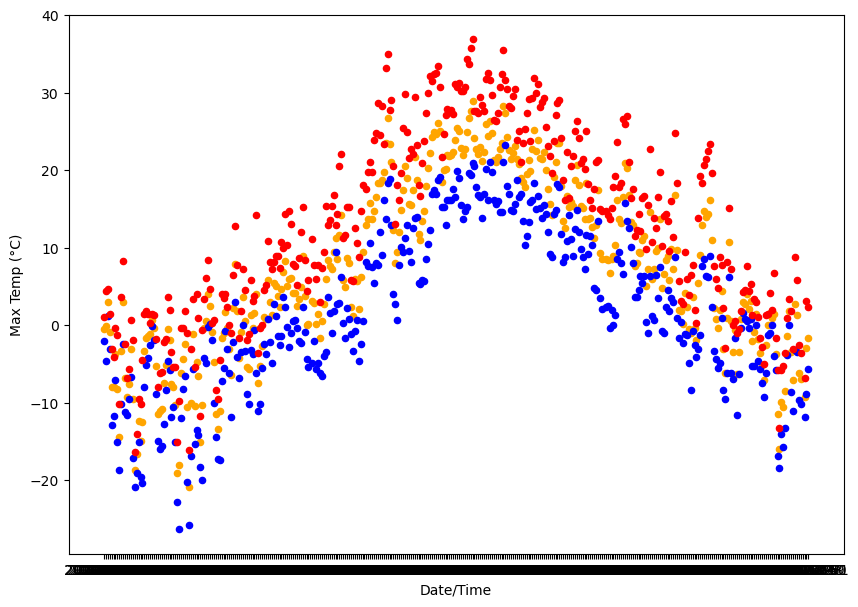

In [11]:
ax = weather2020.plot(x = 'Date/Time', y = 'Mean Temp (°C)', kind='scatter', color='orange', figsize=(10,7))
ax = weather2020.plot(x = 'Date/Time', y = 'Min Temp (°C)', kind='scatter', color='blue', ax=ax)
ax = weather2020.plot(x = 'Date/Time', y = 'Max Temp (°C)', kind='scatter', color='red', ax=ax)

Comment: "issue can be seen from `.info()` above" needs more context. I can't find it to understand what we are fixing lol. There is a logic issue in this section for the reader (I am lost)

The plotting pattern appears consistent, however the x-asis (Dat/Time) has labeling that is very weird! Why is it just a set of lines without the years rendering? 

Issue can be seen from `.info()` above. "Date" is an object, but should be "datetime64." There are two ways to correct this. Either specify type during reading (JvdK reading what???) or correct afterwards (after what???? JvdK).

Comment: There are two sets of codes below [12] and [13] which one is doing which type of cleaning? please provide little bit of explaination. 

In [12]:
weather2020['Date/Time'] = weather2020['Date/Time'].astype('datetime64')

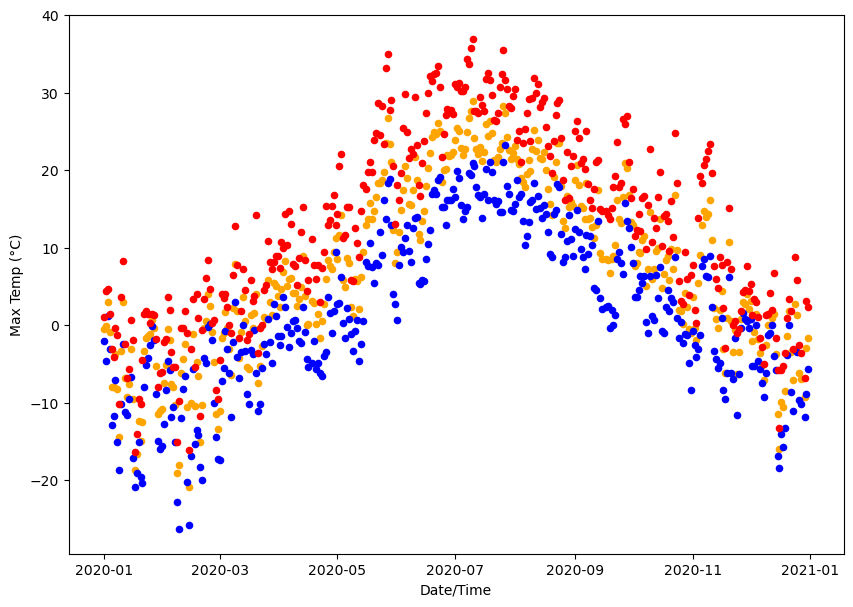

In [13]:
ax = weather2020.plot(x = 'Date/Time', y = 'Mean Temp (°C)', kind='scatter', color='orange', figsize=(10,7))
ax = weather2020.plot(x = 'Date/Time', y = 'Min Temp (°C)', kind='scatter', color='blue', ax=ax)
ax = weather2020.plot(x = 'Date/Time', y = 'Max Temp (°C)', kind='scatter', color='red', ax=ax)

Looks good! All the dates are now rendered on the x-axis. 

Now we are ready to combine our two datasets so we can actually relate the cyclist data to the weather data. Pandas comes with a merge function that lets you merge two datasets on a certain column. In our case, that would be "Date" and "Date/Time."

In [14]:
data2020 = pd.merge(left=bike2020, right=weather2020, left_on='Date', right_on='Date/Time')
data2020.drop('Date/Time', inplace=True, axis=1)

Show all columns

Comment: make the sentence above more descriptive in a form of actual complete sentence. e.g., "You can see all combined columns by running the code below."

In [15]:
data2020.columns

Index(['Date', '1^ALEX', '2^ORPY', '3^COBY', '4^CRTZ', '5^LMET', '10^OGLD',
       '11 OBVW', '12a^ADAWE', '12b^ADAWE', 'Max Temp (°C)', 'Min Temp (°C)',
       'Mean Temp (°C)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
       'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)',
       'Snow on Grnd (cm)', 'Dir of Max Gust (10s deg)',
       'Spd of Max Gust (km/h)'],
      dtype='object')

Data exploration

Comment: what is the use for the code below? what is exactly Data exploration? needs more description here. 

<AxesSubplot: xlabel='Mean Temp (°C)', ylabel='1^ALEX'>

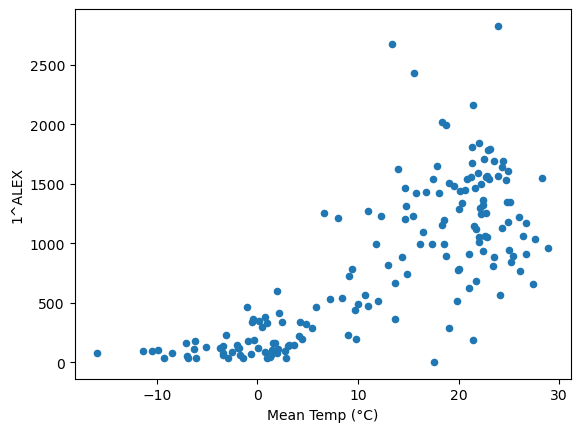

In [16]:
data2020.plot(kind='scatter', x='Mean Temp (°C)', y='1^ALEX')

Comment: here we can use a descriptive explanation regarding the y and x axis and what we are looking at in the plot above.


There definitely seems to be a relation between temperature and number of cyclists on the NCC Alexandra Bridge Bikeway. Also note that we don't see many data points under -10 °C. We can understand why, by reading the data documentation on the Open Ottawa website.

> Winter Counts:
> 
> Only the counters designated as 'winter' counters have valid data after the first snow accumulation, until snow has been removed or melted away in spring. Winter counters imply some winter maintenance of the pathway or bike lane. The Somerset counter bike lane (westbound only) is cleared of snow on a best-effort basis only, and typically will not show all the cyclists along that route immediately following a heavy snow-fall.

And this counter is indeed not marked as winter. So it's simply not plowed.

Comment: soooooooooo I don't want to be a pain BUT what does that mean for all the 0 values you took out in the cyclist data?????

How about rain?

Comment: what is the question here? Does rain impact number of cyclists? Does rain impact the equipment? 

<AxesSubplot: xlabel='Total Rain (mm)', ylabel='12a^ADAWE'>

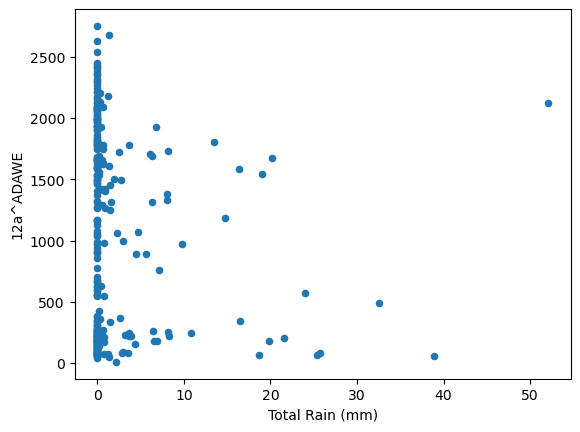

In [17]:
data2020.plot(kind='scatter', x='Total Rain (mm)', y='12a^ADAWE')

This plotting graph shows us that there are are fewer cyclists (y-axis) on the days that have more milimeters of rainfall (y-axis). This is a good example of potential bias. We have lots more data for non-rainy days, or days with minimal milimeters of rainfall, so it might overpower our learning algorithm. 

Comment" "overpower uour learning algorythm" TELL ME MORE WHAT DOES THAT MEAN???? That the algorythm may make innacurate predictions because it understands non-rainy days to be, what, the most likely outcome? What makes this a bias if it is statistically accurate? 

Also, what's up with that dot on the right, reporting more than 2000 cyclists on a day with over 50mm of rainfall? So many cyclists in a massive storm? That seems suspicious. This is probably an outlier and we should remove it form our training dataset. But first, let's check another counter.

<AxesSubplot: xlabel='Total Rain (mm)', ylabel='4^CRTZ'>

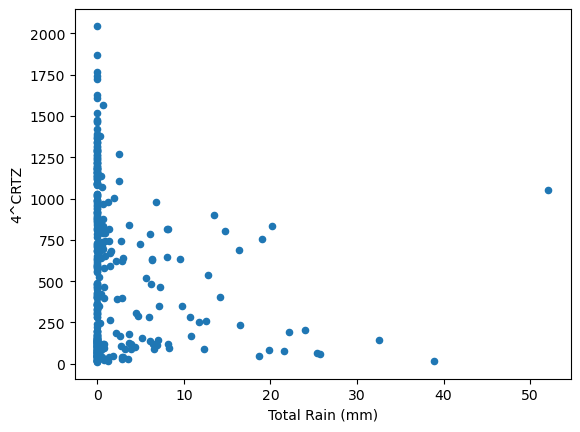

In [18]:
data2020.plot(kind='scatter', x='Total Rain (mm)', y='4^CRTZ')

That is not right. Let's see the whole row

Comment; what is not right here? I can't see it

In [19]:
data2020[data2020['Total Rain (mm)'] > 50]

,Date,1^ALEX,2^ORPY,3^COBY,4^CRTZ,5^LMET,10^OGLD,11 OBVW,12a^ADAWE,12b^ADAWE,...,Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h)
156,2020-06-05,1452.0,2340.0,1527.0,1054.0,1297.0,1129.0,1461.0,2125.0,2294.0,...,11.3,20.6,0.0,2.6,52.1,0.0,52.1,NaN,20.0,52.0


Either the rain sensor was malfunctioning or the bike counters don't like lots of rain. Better get rid of that row.

Comment; can you be explicit about what you see here that leads to this conclusion? 

In [20]:
data2020.drop(156, inplace=True)

Now that we have removed the outliers, let's look at more correlations. 

Dark blue means large negative correlation, dark red means large positive correlation. These are the weather conditions having the most impact on the number of cyclists.

Comment: this sounds cool but where is the graph that corresponds to these comments? I don't see blue/red

In [21]:
corr = data2020.select_dtypes(['number']).corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

/tmp/ipykernel_24816/1826579227.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)


,1^ALEX,2^ORPY,3^COBY,4^CRTZ,5^LMET,10^OGLD,11 OBVW,12a^ADAWE,12b^ADAWE,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h)
1^ALEX,1.00,0.90,0.97,0.89,0.87,0.97,0.95,0.88,0.42,0.78,0.70,0.76,-0.77,0.48,-0.17,-0.24,-0.21,0.00,0.00,-0.18
2^ORPY,0.90,1.00,0.81,0.68,0.78,0.90,0.90,0.87,0.55,0.68,0.55,0.63,-0.68,0.24,-0.20,-0.22,-0.24,-0.15,0.06,-0.08
3^COBY,0.97,0.81,1.00,0.86,0.91,0.95,0.93,0.88,0.42,0.77,0.67,0.73,-0.75,0.39,-0.23,-0.23,-0.26,-0.04,0.04,-0.21
4^CRTZ,0.89,0.68,0.86,1.00,0.87,0.88,0.84,0.89,0.63,0.81,0.71,0.77,-0.78,0.44,-0.17,-0.26,-0.24,-0.33,0.04,-0.15
5^LMET,0.87,0.78,0.91,0.87,1.00,0.89,0.88,0.92,0.48,0.82,0.75,0.80,-0.80,0.51,-0.13,-0.26,-0.21,0.18,0.08,-0.14
10^OGLD,0.97,0.90,0.95,0.88,0.89,1.00,0.99,0.96,0.66,0.79,0.69,0.76,-0.77,0.42,-0.16,-0.24,-0.22,-0.29,0.04,-0.12
11 OBVW,0.95,0.90,0.93,0.84,0.88,0.99,1.00,0.95,0.53,0.79,0.69,0.75,-0.76,0.43,-0.15,-0.23,-0.21,-0.28,0.06,-0.11
12a^ADAWE,0.88,0.87,0.88,0.89,0.92,0.96,0.95,1.00,0.76,0.85,0.77,0.82,-0.84,0.44,-0.13,-0.28,-0.21,-0.19,0.04,-0.15
12b^ADAWE,0.42,0.55,0.42,0.63,0.48,0.66,0.53,0.76,1.00,0.49,0.40,0.45,-0.52,0.00,-0.25,-0.34,-0.35,-0.45,0.07,-0.16
Max Temp (°C),0.78,0.68,0.77,0.81,0.82,0.79,0.79,0.85,0.49,1.00,0.94,0.99,-0.97,0.66,0.11,-0.31,0.01,-0.37,0.01,0.01


Comment: Clarify this sentence, little correlation between cyclists and weather? The pattern is so distinct we can draw the conclusion that therefore this counter is likely counting something that is not cyclists?  "There is very little correlation between 12b^ADAWE and all the other counters which is another indication that something is up with that counter. It's probably just pedestrians."

In all otehr columns, we see a strong positive correlation with temperature. People cycle more when it's warmer. There's a fairly strong negative correlation with "Heat Deg Days (°C)", but what is that? From the Environment Canada website:

> **Heating Degree-days**
> 
> Heating degree-days for a given day are the number of degrees Celsius that the mean temperature is below 18 °C. If the temperature is equal to or greater than 18 °C, then the number will be zero. For example, a day with a mean temperature of 15.5 °C has 2.5 heating degree-days; a day with a mean temperature of 20.5 °C has zero heating degree-days. Heating degree-days are used primarily to estimate the heating requirements of buildings.

So it's just a day on which people turn on their heating. i.e. cold days.

Other correlations here are snow, rain and wind speed. Direction of wind doesn't matter much.

The other thing we need to think about for the data columns is how independent they are. That is, it doesn't make sense to predict the number of cyclist on both "max temp" and "mean temp" since the correlation is almost 1. They carry essentially the same value so we would just be introducing ambiguity into the model. 

The same redundency occurs with "total precipitation" and "total rain." It's probably better to use only the values for "precipitation;" or only the values for "snow" and "rain."

Ok, so lets remove 12b^ADAWE, Min Temp (°C), Mean Temp (°C), and Total Precip (mm) from our training data set.

In [22]:
data2020.drop(['12b^ADAWE', 'Min Temp (°C)', 'Mean Temp (°C)', 'Total Precip (mm)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)'], inplace=True, axis=1)

We now have a pretty clean data set, but there is still some **missing data**

In [2]:
data2020.info()

NameError: name 'data2020' is not defined

Only three of the seven counters have daily data. Weather data is missing on some days. We could drop all the rows that have missing data, but... (JvdK but what? this would impact the accuracy or our prediction model?)

Comment: Here we can guide the users that which column we are referring to , e.g., column 3: Non Null Count: all rows need to be 365 (days of year) but instead we have some missing data.

Comment: what does the code below do? can use a bit of expalanation. 

In [24]:
len(data2020.dropna())

13

Only 13 rows left. Let's not do that! What else can we do though? We can impute data, which is basically fancy lying. We could substitute the NaN values with the mean, or we could use interpolation of neighbouring days. Anything that could lead to reasonable guesses.

For example, the "Snow on Grnd (cm)" is missing a lot of values. Let's see what's up with that.

<AxesSubplot: xlabel='Date', ylabel='Snow on Grnd (cm)'>

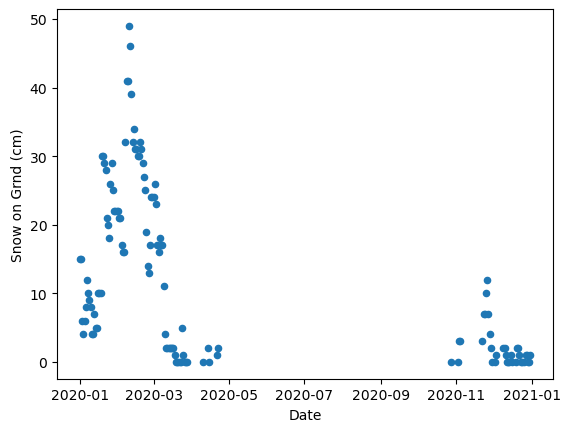

In [25]:
data2020.plot(x='Date', y='Snow on Grnd (cm)', kind='scatter')

Right, they just don't measure the snow on the ground in the summer. We can fill all missing values with 0 maybe.

<AxesSubplot: xlabel='Date', ylabel='Snow on Grnd (cm)'>

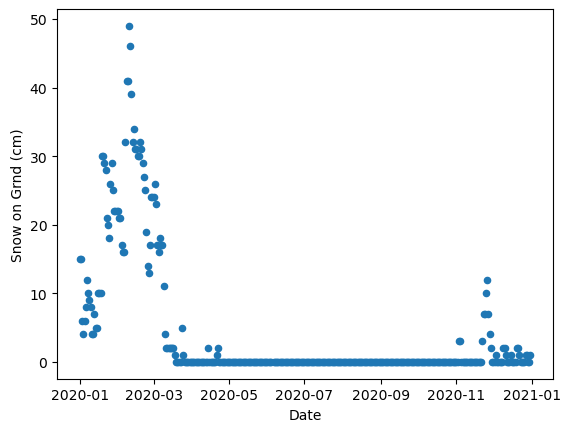

In [26]:
data2020.fillna({'Snow on Grnd (cm)': 0}).plot(x='Date', y='Snow on Grnd (cm)', kind='scatter')

That's a bit too much. Might be better to use the backfill method which just take the value from the next day to fill in NaN

Comment: what do you mean from "That's a bit too much." what are we trying to do here and how that is different from the plot/code above? can use a bit of explanation. 
Comment: It would be a good idea to explain what is the "backfill method."

<AxesSubplot: xlabel='Date', ylabel='Snow on Grnd (cm)'>

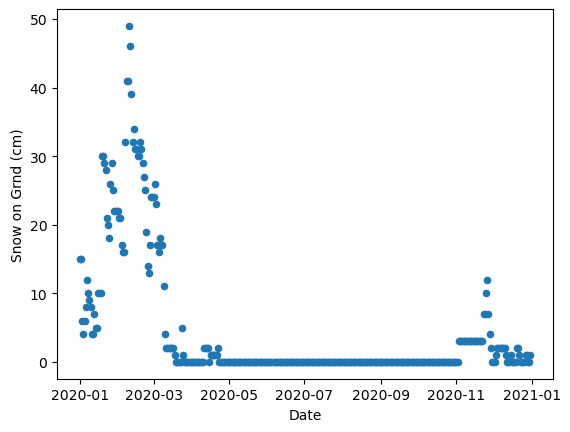

In [27]:
data2020['Snow on Grnd (cm)'] = data2020['Snow on Grnd (cm)'].fillna(method='backfill')
data2020.plot(x='Date', y='Snow on Grnd (cm)', kind='scatter')

That looks better. Lets see how many complete rows we have now.

In [28]:
len(data2020.dropna())

53

Better indeed!

Next is the missing data for the wind gusts

<AxesSubplot: xlabel='Date'>

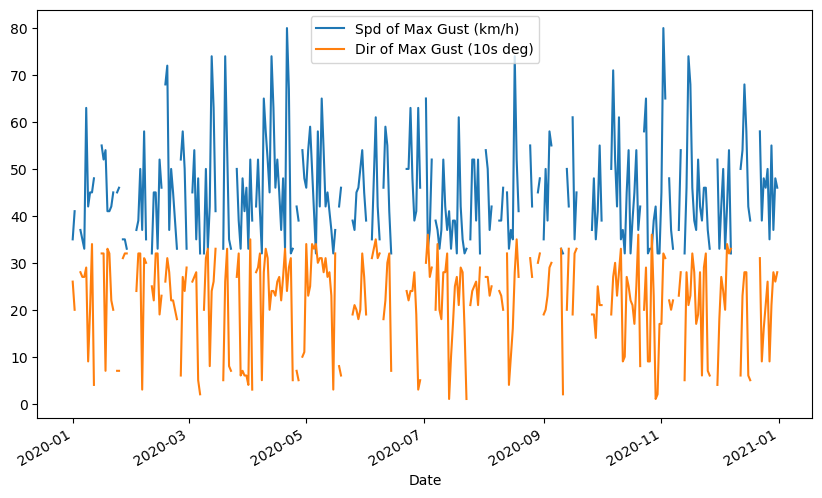

In [29]:
data2020.plot(x='Date', y=['Spd of Max Gust (km/h)', 'Dir of Max Gust (10s deg)'], kind='line', figsize=(10,6))

Comment: In the paragraph below, you mentioned "backfill won't do much either." I am not sure how important that is or how much the user might know about that but I think it can use a bit of explanation if it serves an important pupose of even can be removed since we are not actually using that. 

That seems to vary a lot and it's all over the place. Setting it to zero isn't good, backfill won't do much either since it varies so much. So lets just use the mean value for the speed and the wind direction

Comment: Before In [31], it would be a good idea to explain again what we are trying to see. I assume  we want to see many complete rows we have now. Right?

Comment: Same thing for In [32]. what does that line do?

In [30]:
data2020.fillna({
    'Dir of Max Gust (10s deg)': data2020['Dir of Max Gust (10s deg)'].mean(),
    'Spd of Max Gust (km/h)': data2020['Spd of Max Gust (km/h)'].mean()
}, inplace=True)

In [31]:
len(data2020.dropna())

70

In [32]:
data2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 365
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       365 non-null    datetime64[ns]
 1   1^ALEX                     171 non-null    float64       
 2   2^ORPY                     166 non-null    float64       
 3   3^COBY                     256 non-null    float64       
 4   4^CRTZ                     365 non-null    float64       
 5   5^LMET                     365 non-null    float64       
 6   10^OGLD                    356 non-null    float64       
 7   11 OBVW                    329 non-null    float64       
 8   12a^ADAWE                  288 non-null    float64       
 9   Max Temp (°C)              361 non-null    float64       
 10  Total Rain (mm)            364 non-null    float64       
 11  Total Snow (cm)            364 non-null    float64       
 12  Snow on 

Not a lot of missing values for the rest of the weather. We can just use backfill again.

In [33]:
data2020['Max Temp (°C)'] = data2020['Max Temp (°C)'].fillna(method='backfill')
data2020['Total Rain (mm)'] = data2020['Total Rain (mm)'].fillna(method='backfill')
data2020['Total Snow (cm)'] = data2020['Total Snow (cm)'].fillna(method='backfill')

In [34]:
len(data2020.dropna())

71

Still have missing data for some of the bike counters. Let's look at all of them again

<AxesSubplot: xlabel='Date'>

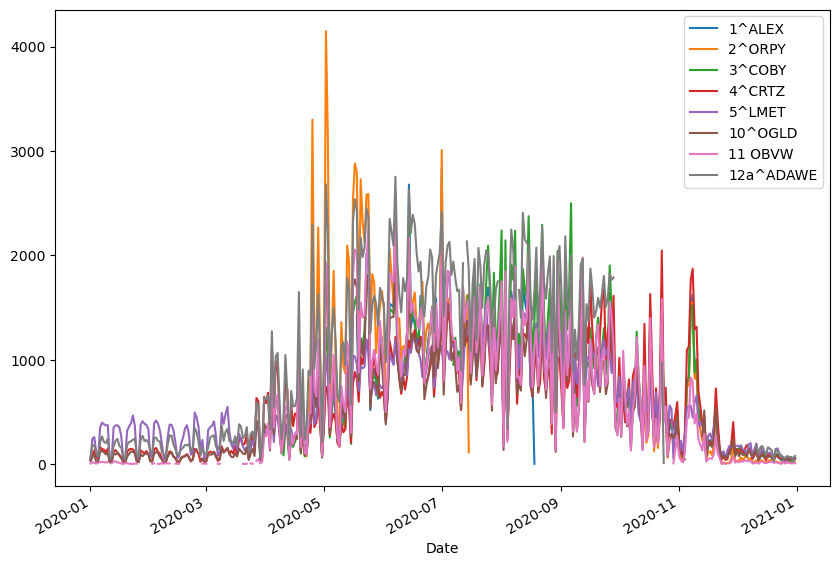

In [35]:
data2020.plot(x='Date', y=['1^ALEX','2^ORPY','3^COBY','4^CRTZ','5^LMET','10^OGLD','11 OBVW','12a^ADAWE'], figsize=(10,7))

They all follow roughly the same pattern. Lets fill NaN values with the mean from the other counters on that day

Comment: How about the 2^ORPY? it has more anomality? Do we care about that?

Comment: Maybe we need to have a bit of explanation about the error below and how to fix it. 

In [2]:
countercolumns = ['1^ALEX','2^ORPY','3^COBY','4^CRTZ','5^LMET','10^OGLD','11 OBVW','12a^ADAWE']
for colname in countercolumns:
    othercolumns = [c for c in countercolumns if c != colname]
    meanofmissing = data2020[data2020[colname].isna()][othercolumns].mean(axis=1)
    data2020.loc[data2020[colname].isna(), colname] = meanofmissing

NameError: name 'data2020' is not defined

<AxesSubplot: xlabel='Date'>

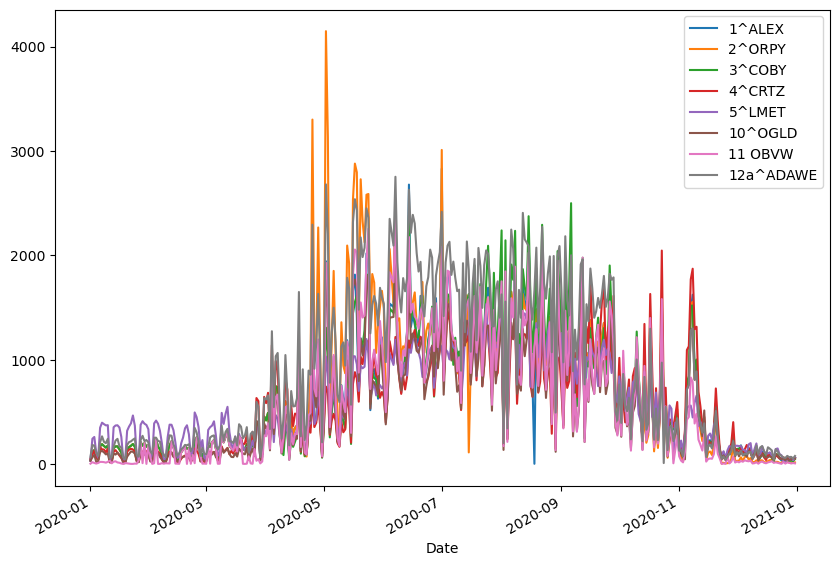

In [37]:
data2020.plot(x='Date', y=['1^ALEX','2^ORPY','3^COBY','4^CRTZ','5^LMET','10^OGLD','11 OBVW','12a^ADAWE'], figsize=(10,7))

In [38]:
data2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 365
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       365 non-null    datetime64[ns]
 1   1^ALEX                     365 non-null    float64       
 2   2^ORPY                     365 non-null    float64       
 3   3^COBY                     365 non-null    float64       
 4   4^CRTZ                     365 non-null    float64       
 5   5^LMET                     365 non-null    float64       
 6   10^OGLD                    365 non-null    float64       
 7   11 OBVW                    365 non-null    float64       
 8   12a^ADAWE                  365 non-null    float64       
 9   Max Temp (°C)              365 non-null    float64       
 10  Total Rain (mm)            365 non-null    float64       
 11  Total Snow (cm)            365 non-null    float64       
 12  Snow on 

We have the full data now. All fields are filled in ith hopefully reasonable values. We finally have a clean dataset we can work with. Remember all the way from the beginning, we want to predict the number of cyclist depending on the weather. We can either build a model for each bike lane.

# Linear Regression

Comment: JvdK please write a short introduction to transition the learner to using Linear regression as a method for... What? it worths mentioning that why do we use Linear regression here: something like: "In order to predict the value of a dependent variable andthe level of accuracy of our prediction is we use a linear regression model."

The easiest machine learning model is linear regression. It assumes that all relations with the various weather effects are linear which may not be completely true. Think about temperature. Too cold deters some cyclist, but so might too warm.

We will use scikit learn as our machine learning package. This is by far from the only one, but it's a nice one.

Comment: add a sentence indicating that we are going to import the model using the code below. 

In [39]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

Comment: What does it mean the model is any good? What are we hoping to see? explain this.

We will need to train a model and then we need to test our model to see if it is any good. A very common way of doing this is to split your data set into a training and testing set. Sklearn has the function `train_test_split` for that.

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
data2020.columns

Index(['Date', '1^ALEX', '2^ORPY', '3^COBY', '4^CRTZ', '5^LMET', '10^OGLD',
       '11 OBVW', '12a^ADAWE', 'Max Temp (°C)', 'Total Rain (mm)',
       'Total Snow (cm)', 'Snow on Grnd (cm)', 'Dir of Max Gust (10s deg)',
       'Spd of Max Gust (km/h)'],
      dtype='object')

In [42]:
X = data2020[['Max Temp (°C)', 'Total Rain (mm)',
       'Total Snow (cm)', 'Snow on Grnd (cm)', 'Dir of Max Gust (10s deg)',
       'Spd of Max Gust (km/h)']]
y = data2020[['1^ALEX', '2^ORPY', '3^COBY', '4^CRTZ', '5^LMET', '10^OGLD',
       '11 OBVW', '12a^ADAWE']]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)

Comment: Before In [42], it might be a good idea to explian what purpose the code is going to serve?

Now fit the model

In [43]:
model.fit(X_train, y_train)

LinearRegression()

In [44]:
model.coef_

array([[ 44.14867539, -38.39460877,  12.4317299 ,   0.7659504 ,
          2.91979202,  -5.95550865],
       [ 49.54101646, -45.69870837,  10.88597348,   0.07262623,
          4.36006953,  -4.60448024],
       [ 44.8539011 , -36.27320751,  12.40451719,   2.17827332,
          2.02837798,  -4.87466167],
       [ 31.55973948, -24.50762134,   6.1551402 ,  -1.97466813,
          2.0700718 ,  -6.29371114],
       [ 32.10564269, -14.09918768,   7.2654903 ,   4.61364465,
          4.89464094,  -5.54050443],
       [ 36.2096173 , -34.93295147,   7.08014301,  -0.68433923,
          1.56309185,  -3.65816655],
       [ 43.79389016, -39.13118691,  15.82806245,   0.26847335,
          2.46298461,  -3.94632703],
       [ 55.3907029 , -40.6323189 ,  13.81858644,  -0.34297473,
          4.34991545,  -8.20242156]])

In [45]:
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
predictions = model.predict(X_test)

In [47]:
r2_score(y_test, predictions)

0.6941037431425445

In [48]:
mean_squared_error(y_test, predictions, squared=False)

318.85619626088743

Comment: again before the codes above, you can provide a line of inforamtion regarding what they are doing. 


Let's see how well this works for 2019. Our data set was for 2020.

In [49]:
bike2019 = pd.read_excel('bike_counter.xlsx', sheet_name="2019")

We don't care too much about fixing the weather data for just comparing, but at least fill in the missing snow otherwise we will miss too much.

In [87]:
weather2019 = pd.read_csv('en_climate_daily_ON_6106001_2019_P1D.csv')
weather2019 = weather2019[['Date/Time', 'Max Temp (°C)', 'Total Rain (mm)', 'Total Snow (cm)', 'Snow on Grnd (cm)',
             'Dir of Max Gust (10s deg)', 'Spd of Max Gust (km/h)']]
weather2019['Snow on Grnd (cm)'] = weather2019['Snow on Grnd (cm)'].fillna(method='backfill')

Now drop all rows with NA values. We also need to reset the index in pandas otherwise assigning values becomes a bit weird later on.

In [88]:
weather2019 = weather2019.dropna().reset_index().drop('index', axis=1)

Do the prediction using the 2019 weather.

In [94]:
bikepred2019 = pd.DataFrame(
    model.predict(
        weather2019.drop('Date/Time', axis=1)),
        columns=['1^ALEX', '2^ORPY', '3^COBY', '4^CRTZ', '5^LMET', '10^OGLD', '11 OBVW', '12a^ADAWE'])
bikepred2019['Date'] = weather2019[['Date/Time']].astype('datetime64')

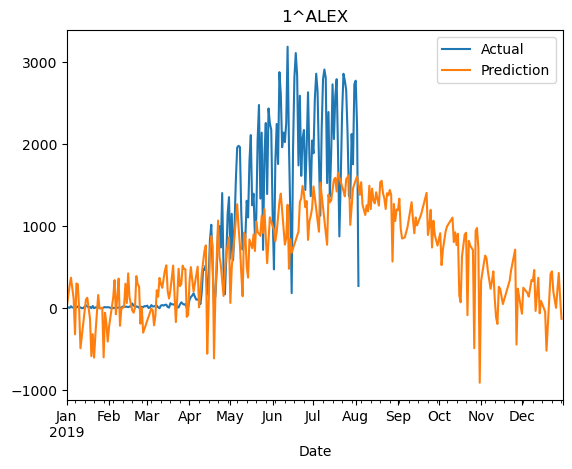

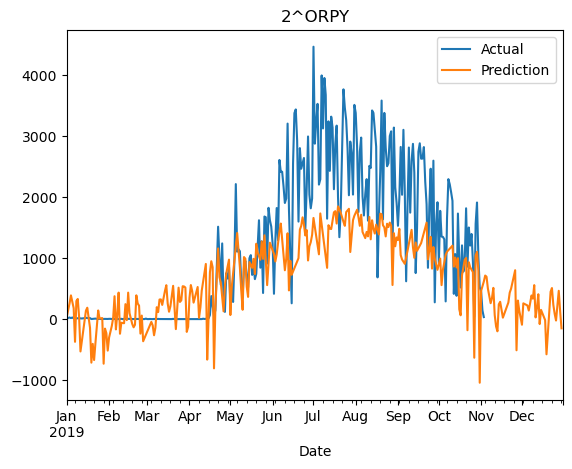

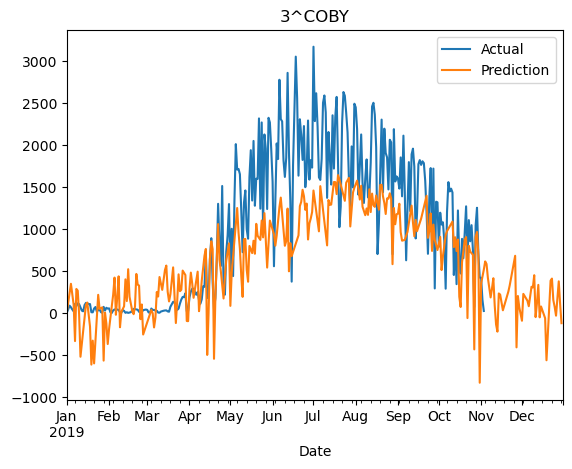

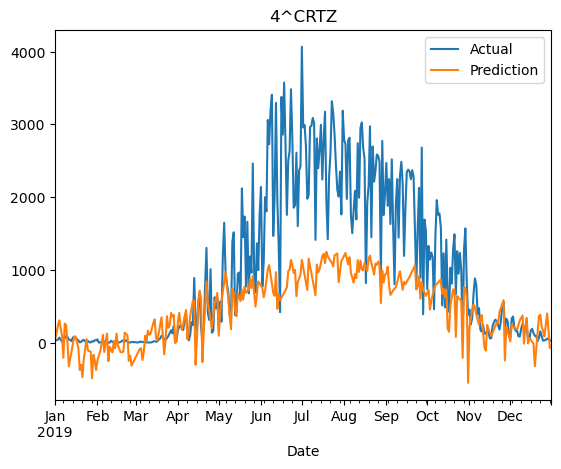

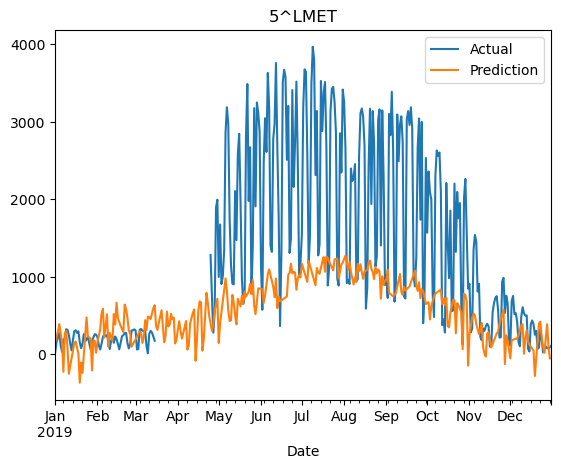

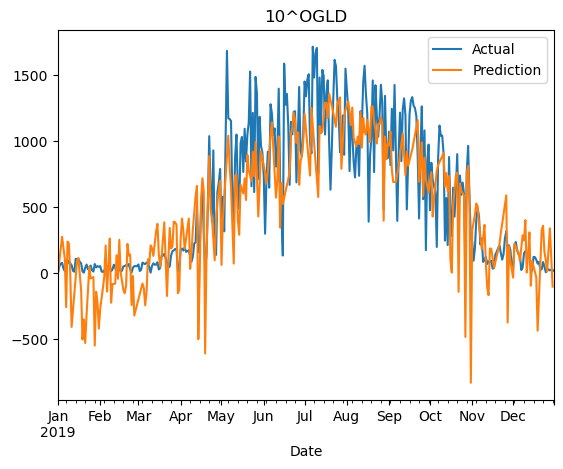

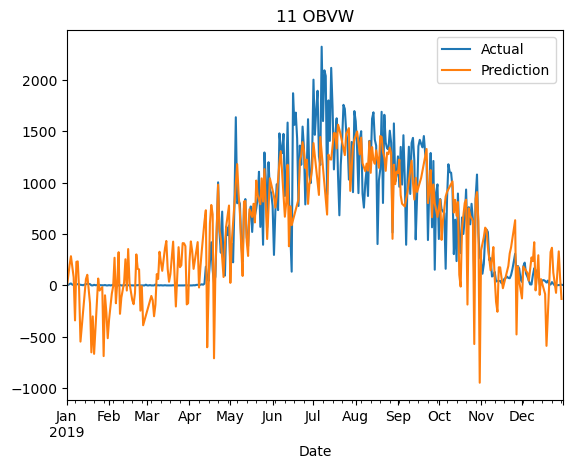

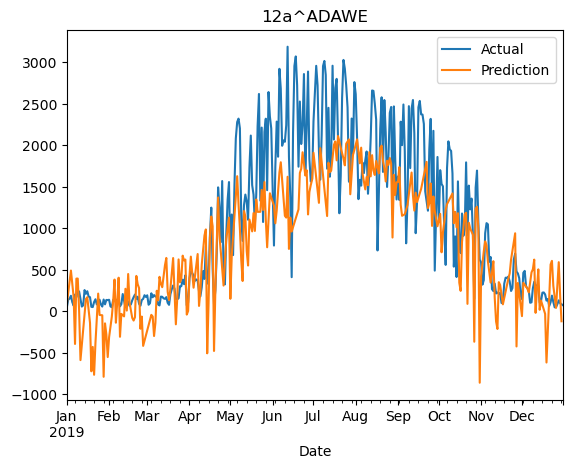

In [99]:
for colname in ['1^ALEX', '2^ORPY', '3^COBY', '4^CRTZ', '5^LMET', '10^OGLD', '11 OBVW', '12a^ADAWE']:
    ax = bike2019.plot(x='Date', y=colname, label='Actual', title=colname)
    bikepred2019.plot(x='Date', y=colname, ax=ax, label='Prediction')

# Conclusion
The model works fairly well for some of the lanes, but rather poorly for some of the others. It always reproduces the overall trend though. Keep in mind that the date was not part of the training data. It's solely reproducing this trend from the weather data

Comment: The paragraph above can use a bit of expalanation about which lane was fairly good and which were not.